In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

import surprise
data = surprise.Dataset.load_builtin('ml-100k')  

df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rate", "id"])
del df["id"]
df.head(10)

# Google colab: 데이터 경로 설정
path = '../data/ml-latest-small/'

os.listdir(path)

ratings_df = pd.read_csv(os.path.join(path + 'ratings.csv'), encoding='utf-8')
tags_df = pd.read_csv(os.path.join(path + 'tags.csv'), encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path + 'movies.csv'), index_col='movieId', encoding='utf-8')

In [3]:
movies_df = pd.read_csv("/Users/reejungkim/Documents/datasets/movies.csv")
ratings_df = pd.read_csv("/Users/reejungkim/Documents/datasets/ratings.csv")
tags_df = pd.read_csv("/Users/reejungkim/Documents/datasets/genres.csv")

* timestamp는 영화에 대한 평점을 기록한 시점. 영화가 처음 출시한 시점이 아니다

In [4]:
print(ratings_df.shape)
print(ratings_df.head())

(20000263, 4)
   user_id  movie_id  rating    rated_at
0        1         2     3.5  1112486027
1        1        29     3.5  1112484676
2        1        32     3.5  1112484819
3        1        47     3.5  1112484727
4        1        50     3.5  1112484580


In [5]:
print(tags_df.shape)
print(tags_df.head())

(54406, 2)
   movie_id      genre
0         1  Adventure
1         1  Animation
2         1   Children
3         1     Comedy
4         1    Fantasy


In [6]:
print(movies_df.shape)
print(movies_df.head())

(27278, 3)
   id                        title  release_year
0   1                    Toy Story          1995
1   2                      Jumanji          1995
2   3             Grumpier Old Men          1995
3   4            Waiting to Exhale          1995
4   5  Father of the Bride Part II          1995


### 평점 데이터의 기초 통계량

In [7]:
n_unique_users = len(ratings_df['user_id'].unique())
print(n_unique_users)

138493


In [8]:
n_unique_movies = len(ratings_df['movie_id'].unique())
print(n_unique_movies)

26744


In [9]:
print('평점의 평균: ', ratings_df['rating'].mean())
print('평점의 표준편차: ', ratings_df['rating'].std())

평점의 평균:  3.5255285642993797
평점의 표준편차:  1.0519889192942424


In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   movie_id  int64  
 2   rating    float64
 3   rated_at  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [11]:
ratings_df.describe()

,user_id,movie_id,rating,rated_at
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [12]:
# nan 값이 있는지 확인한다
ratings_df.isnull().sum()

user_id     0
movie_id    0
rating      0
rated_at    0
dtype: int64

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'movie_id'}>],
       [<AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>]],
      dtype=object)

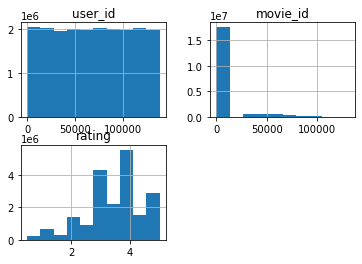

In [13]:
ratings_df[['user_id','movie_id','rating']].hist()

### Pandas의 GroupBy 사용하기

In [15]:
ratings_df.groupby(['user_id', 'rating']).size()

user_id  rating
1        3.0        14
         3.5        73
         4.0        81
         4.5         3
         5.0         4
                  ... 
138493   3.0        32
         3.5        25
         4.0       104
         4.5       109
         5.0        88
Length: 882154, dtype: int64

* userId와 rating을 기준으로 기초 통계량

In [17]:
ratings_df.groupby(['user_id']).mean()

,movie_id,rating,rated_at
user_id,,,
1,3428.537143,3.742857,1.107833e+09
2,2098.524590,4.000000,9.748208e+08
3,1698.331551,4.122995,9.450063e+08
4,394.964286,3.571429,8.408791e+08
5,574.484848,4.272727,8.515452e+08
...,...,...,...
138489,3262.657895,3.986842,1.352989e+09
138490,1648.311258,3.556291,9.755439e+08
138491,6498.000000,2.681818,1.238643e+09


In [21]:
user_id_rating_df = pd.DataFrame({'count': ratings_df.groupby(['user_id', 'rating']).size()})
user_id_rating_df = user_id_rating_df.reset_index()
user_id_rating_df.head(10)

,user_id,rating,count
0,1,3.0,14
1,1,3.5,73
2,1,4.0,81
3,1,4.5,3
4,1,5.0,4
5,2,2.0,8
6,2,3.0,10
7,2,4.0,17
8,2,5.0,26
9,3,1.0,3


In [22]:
user_info = ratings_df.groupby('user_id')['movie_id'].count()

In [23]:
user_info.describe()

count    138493.000000
mean        144.413530
std         230.267257
min          20.000000
25%          35.000000
50%          68.000000
75%         155.000000
max        9254.000000
Name: movie_id, dtype: float64

In [24]:
import seaborn as sns

/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

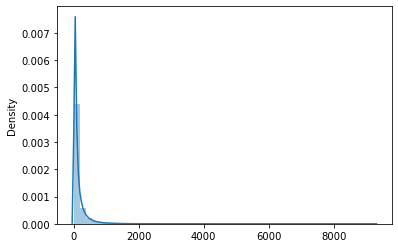

In [25]:
# user가 몇개의 영화에 대해서 rating을 했는지를 볼 수 있는 분포(그래프)
sns.distplot(user_info.values)

### user가 평균적으로 준 평점과 평점을 준 영화의 수

In [26]:
stats_df = pd.DataFrame({
    'movie_count': ratings_df.groupby('user_id')['movie_id'].count(),
    'rating_avg': ratings_df.groupby('user_id')['rating'].mean(), 
'rating_std': ratings_df.groupby('user_id')['rating'].std()})

print(stats_df.shape)
print(stats_df.head())

(138493, 3)
         movie_count  rating_avg  rating_std
user_id                                     
1                175    3.742857    0.382284
2                 61    4.000000    1.064581
3                187    4.122995    0.910427
4                 28    3.571429    0.790151
5                 66    4.272727    0.969464


### rating이 많은 영화(다시 말해, 사람들이 관심 많은 영화)

* 많이 본 영화일수록 평점이 좋다? 

In [27]:
movie_id_user_df = pd.DataFrame({
    'num_users_watch': ratings_df.groupby('movie_id')['user_id'].count(),
    'avg_ratings': ratings_df.groupby('movie_id')['rating'].mean(),
    'std_ratings': ratings_df.groupby('movie_id')['rating'].std()
})
movie_id_user_df = movie_id_user_df.reset_index()
print(movie_id_user_df.shape)
print(movie_id_user_df.head(10))

(26744, 4)
   movie_id  num_users_watch  avg_ratings  std_ratings
0         1            49695     3.921240     0.889012
1         2            22243     3.211977     0.951150
2         3            12735     3.151040     1.006642
3         4             2756     2.861393     1.095702
4         5            12161     3.064592     0.982140
5         6            23899     3.834930     0.880468
6         7            12961     3.366484     0.955883
7         8             1415     3.142049     0.966353
8         9             3960     3.004924     0.960203
9        10            29005     3.430029     0.859035


In [28]:
movie_id_user_df.sort_values(by='num_users_watch', ascending=False)

,movie_id,num_users_watch,avg_ratings,std_ratings
293,296,67310,4.174231,0.976076
352,356,66172,4.029000,0.948018
315,318,63366,4.446990,0.717525
587,593,63299,4.177057,0.842421
476,480,59715,3.664741,0.927818
...,...,...,...,...
23146,110807,1,4.000000,NaN
23148,110811,1,1.500000,NaN
15481,78984,1,2.000000,NaN
23150,110818,1,1.000000,NaN


<AxesSubplot:>

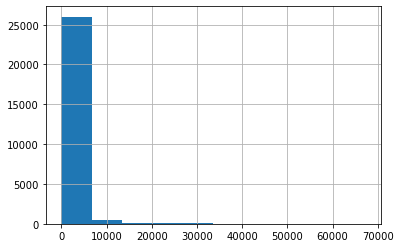

In [29]:
# long tail economy
movie_id_user_df['num_users_watch'].hist()

In [30]:
# 1번 또는 1명만 평점을 준 영화
movie_id_user_df['movie_id'][movie_id_user_df.num_users_watch == 1].count()


3972

In [31]:
# 3번 미만의 영화
movie_id_user_df['movie_id'][movie_id_user_df.num_users_watch < 3].count()

6015

### 평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)

In [32]:
# 영화 정보를 활용
movies_df.head()

,id,title,release_year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [33]:
# 평점을 많이 받은 영화 
ratings_count_df = ratings_df.groupby('movie_id')['user_id'].count()
ratings_count_df.head()

movie_id
1    49695
2    22243
3    12735
4     2756
5    12161
Name: user_id, dtype: int64

In [34]:
df = pd.DataFrame({
    'ratings_count': ratings_df.groupby('movie_id')['user_id'].count(),
})

In [40]:
movies_df

,id,title,release_year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995
...,...,...,...
27273,131254,Kein Bund für's Leben,2007
27274,131256,"Feuer, Eis & Dosenbier",2002
27275,131258,The Pirates,2014
27276,131260,Rentun Ruusu,2001


In [44]:
movies_df['movie_name'] = movies_df.apply(lambda x: movies_df['title'].loc[x.index])


ValueError: Wrong number of items passed 3, placement implies 1

In [ ]:
df.head(10)

In [36]:
df.sort_values(by='ratings_count', ascending=False)

,ratings_count
movie_id,
296,67310
356,66172
318,63366
593,63299
480,59715
...,...
110807,1
110811,1
78984,1


### 특정 영화의 평점 분포

* movie_id :  356, Forrest Gump(1994)
* movie_id : 2571, Matrix, The (1999)

In [ ]:
ratings_df[ratings_df.movie_id == 356]['rating'].hist()

In [ ]:
ratings_df[ratings_df.movie_id == 2571]['rating'].hist()

### 특정 유저가 주는 평점과 실제 영화에 대한 평점 분포가 비슷할까? 

* 나는 일반적인 영화 관람객일까? 특이한 취향을 갖고있는 사람일까? 

In [ ]:
ratings_df[(ratings_df.movie_id == 356) & (ratings_df.rating < 2)]

In [ ]:
ratings_df[(ratings_df.movie_id == 2571) & (ratings_df.rating < 2)]

In [ ]:
ratings_df[ratings_df.user_id == 76]['rating'].hist()